<a href="https://colab.research.google.com/github/R0h1ta/ML-with-Flask/blob/main/toyotaCor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
file = drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('C:/Users/Win 10/Downloads/Toyota.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Win 10/Downloads/Toyota.xlsx'

In [ ]:
df.shape

(1436, 10)

In [ ]:
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [ ]:
df.tail()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,1,110,5,4,5,1114


In [ ]:
print(df.head())
print(df.info())

# Handle missing values (if any)
df = df.fillna(0)

features = ["Price", "Age_08_04", "KM", "Doors", "Cylinders", "Gears", "Weight"]
target = "Price"

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

      KM  HP  Doors  Cylinders  Gears  Weight  
0  46986  90      3          4      5    1165  
1  72937  90      3          4      5    1165  
2  41711  90      3          4      5    1165  
3  48000  90      3          4      5    1165  
4  38500  90      3          4      5    1170  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   objec

In [ ]:


# Encode categorical variables
df["KM"] = LabelEncoder().fit_transform(df["KM"])




NameError: name 'LabelEncoder' is not defined

In [ ]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import statsmodels.formula.api as smf
#linear regression fitting

ml_v = smf.ols('KM ~ HP', data=df).fit()

# t and p-values
print(ml_v.params, '\n', ml_v.pvalues)



Intercept    1292.898808
HP             -6.681420
dtype: float64 
 Intercept    1.164941e-81
HP           2.393874e-26
dtype: float64


In [ ]:
#
ml_wv = smf.ols('KM~HP+Weight',data = df).fit()
print(ml_wv.params,'\n',ml_wv.pvalues)

Intercept    1747.996646
HP             -6.543692
Weight         -0.437385
dtype: float64 
 Intercept    5.452484e-19
HP           2.834526e-25
Weight       1.300577e-02
dtype: float64


In [ ]:
print(ml_v.rsquared, '\n' ,ml_v.rsquared_adj)

0.07566823823705959 
 0.07502365541853595


In [ ]:
print(ml_wv.rsquared,'\n' ,ml_wv.rsquared_adj)

0.07963984005949709 
 0.07835531785441618


In [ ]:
import statsmodels.formula.api as smf
rsq_hp = smf.ols('KM ~HP + Weight + Gears', data=df).fit().rsquared
vif_hp = 1 / (1 - rsq_hp)  # 16.33

rsq_wt = smf.ols('Age_08_04 ~ HP + Doors + Cylinders', data=df).fit().rsquared
vif_wt = 1 / (1 - rsq_wt)  # 564.98

rsq_vol = smf.ols('Weight ~ KM + Weight + HP', data=df).fit().rsquared
vif_vol = 1 / (1 - rsq_vol)  # 564.84

rsq_sp = smf.ols('KM ~ HP + Weight + Gears', data=df).fit().rsquared
vif_sp = 1 / (1 - rsq_sp)  # 16.35

# Storing VIF values in a DataFrame
vif_data = pd.DataFrame({
    "Variables": ["HP", "KM", "Weight", "Age_08_04"],
    "VIF": [vif_hp, vif_wt, vif_vol, vif_sp]
})

# Display the VIF DataFrame
vif_data

<ipython-input-14-56190516fe09>:9: RuntimeWarning: divide by zero encountered in scalar divide
  vif_vol = 1 / (1 - rsq_vol)  # 564.84


,Variables,VIF
0,HP,1.094817
1,HP,1.044506
2,Weight,inf
3,Age_08_04,1.094817


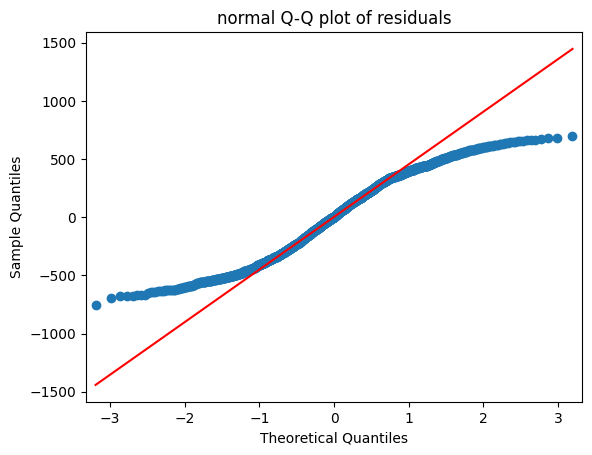

In [ ]:
import statsmodels.api as sm
qqplots = sm.qqplot(ml_v.resid, line='q')
plt.title("normal Q-Q plot of residuals")
plt.show()


In [ ]:

list(np.where(ml_v.resid>10))


[array([   1,    6,    7,    8,   10,   11,   12,   13,   14,   15,   16,
          19,   20,   43,   44,   45,   46,   47,   48,   49,   53,  141,
         186,  187,  188,  189,  190,  191,  192,  193,  194,  195,  196,
         197,  198,  199,  200,  201,  202,  203,  204,  205,  206,  207,
         208,  209,  210,  211,  212,  213,  214,  215,  217,  218,  219,
         220,  221,  222,  223,  224,  225,  226,  228,  231,  233,  378,
         379,  380,  381,  382,  383,  384,  385,  386,  387,  388,  389,
         390,  391,  392,  393,  394,  395,  396,  397,  398,  399,  400,
         401,  402,  403,  404,  405,  406,  407,  408,  409,  410,  411,
         412,  413,  414,  415,  416,  417,  418,  419,  420,  421,  422,
         423,  424,  425,  426,  427,  428,  429,  430,  431,  432,  433,
         434,  435,  436,  437,  438,  439,  440,  441,  442,  443,  444,
         445,  446,  448,  449,  450,  451,  452,  453,  454,  455,  456,
         457,  459,  460,  462,  464, 

In [ ]:
def get_standardized_values(vals):
    return (vals - vals.mean()) / vals.std()

Text(0, 0.5, 'Standardized Residuals')

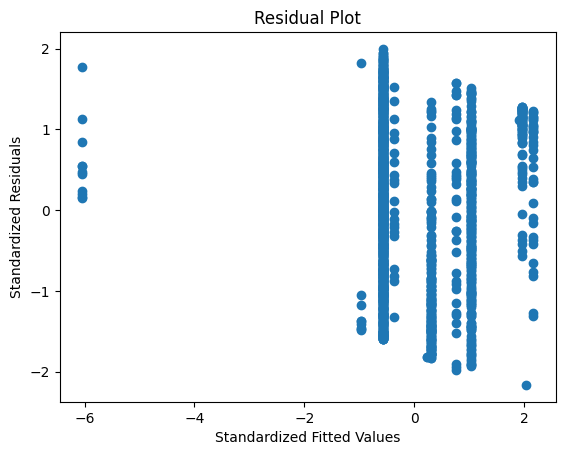

In [ ]:
plt.scatter(get_standardized_values(ml_v.fittedvalues),
            get_standardized_values(ml_v.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')

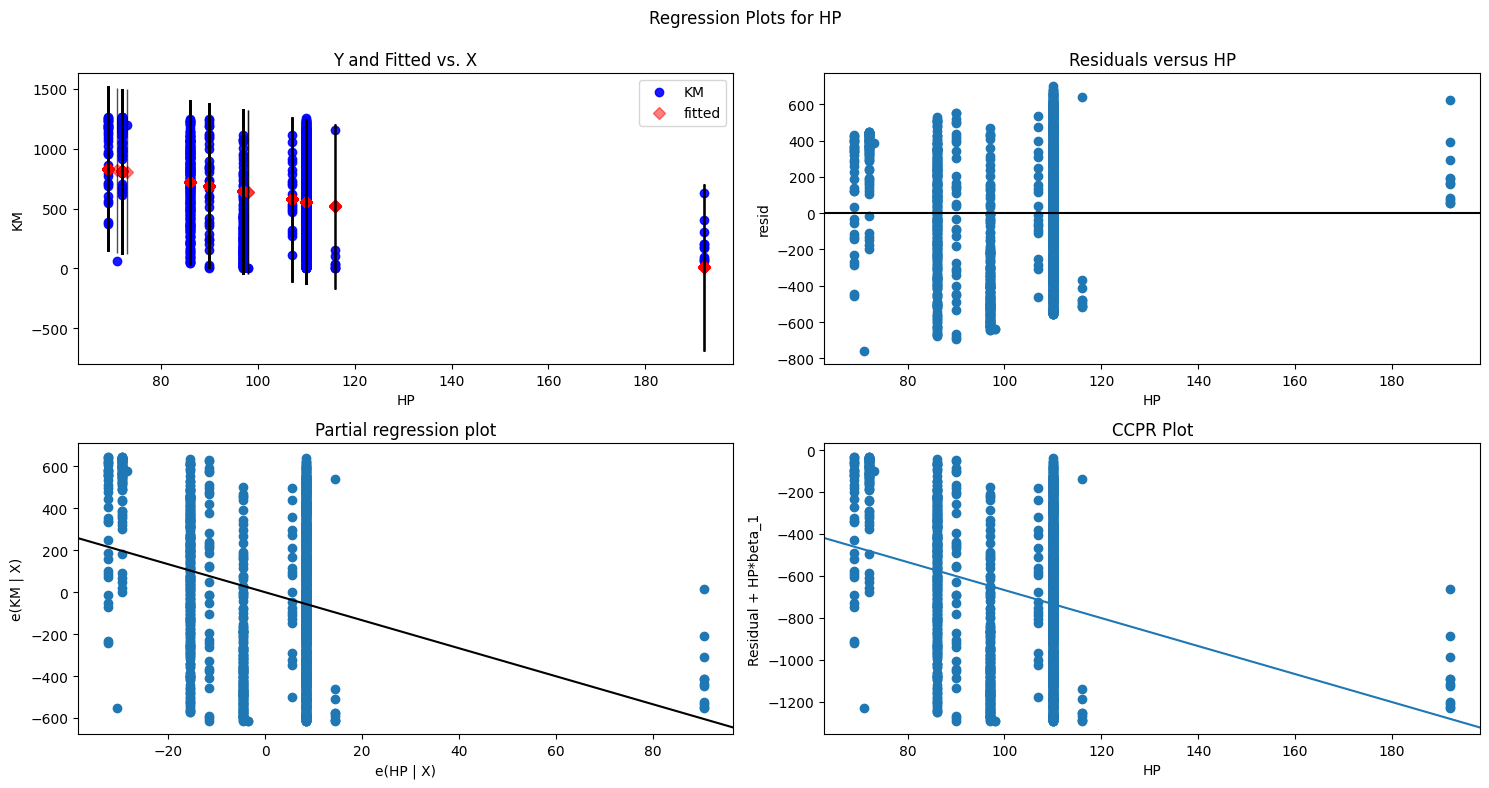

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_v, 'HP', fig=fig)
plt.show()

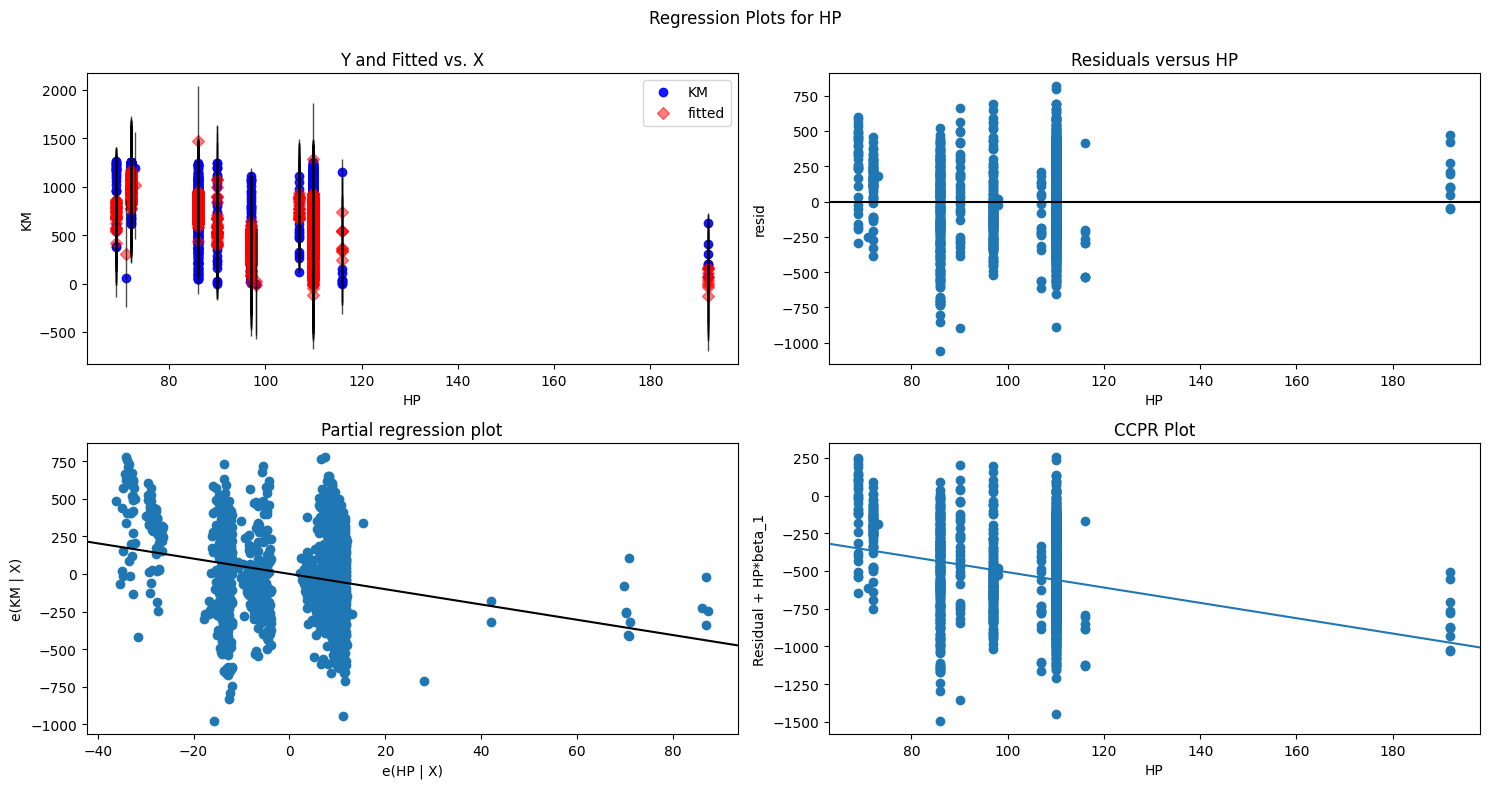

In [ ]:
ml_model = smf.ols('KM ~ HP + Weight + Age_08_04 + Gears', data=df).fit()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_model, 'HP', fig=fig)
plt.show()

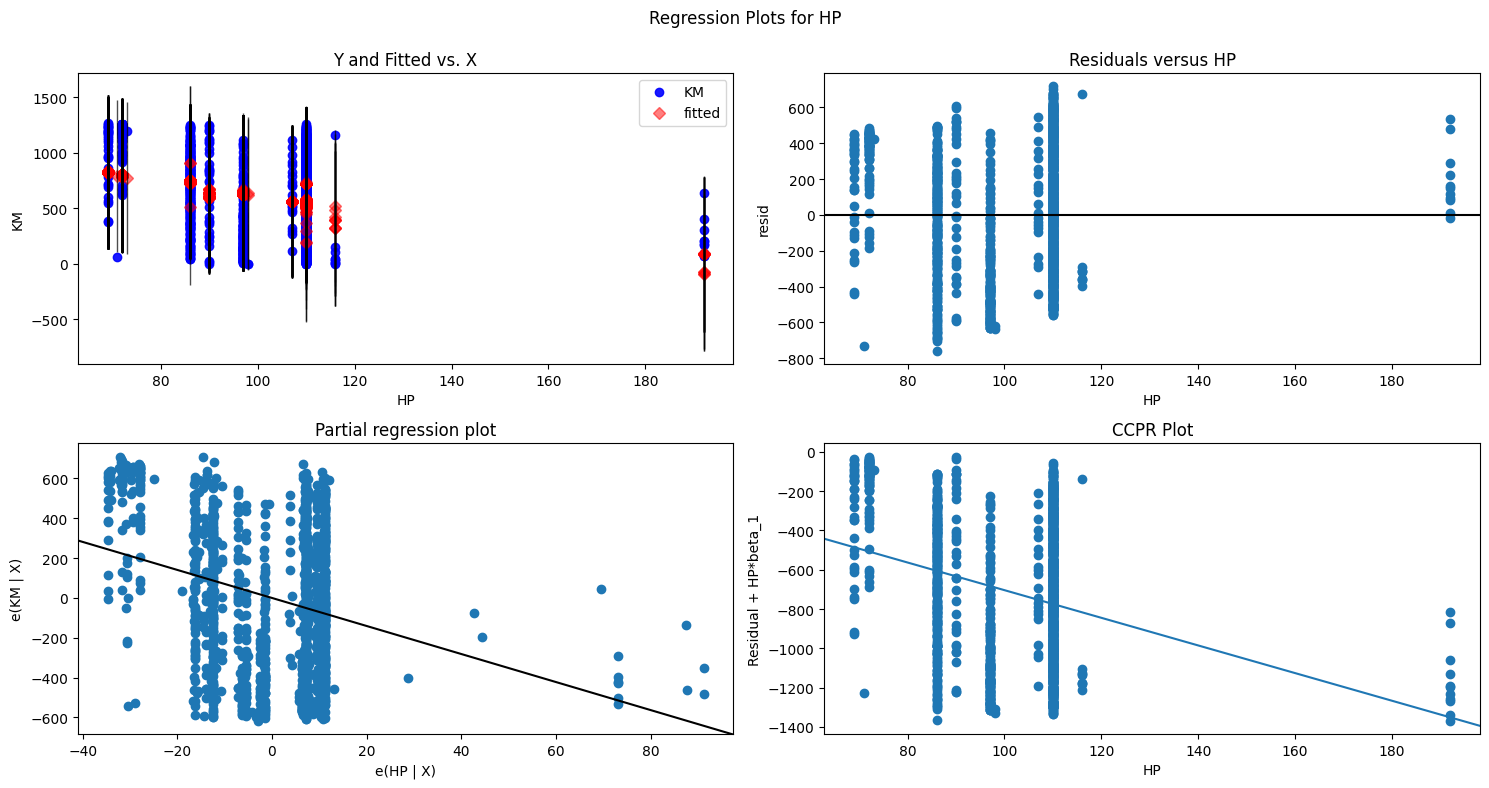

In [ ]:
ml_model = smf.ols('KM ~ HP + Weight + Doors + Gears', data=df).fit()

# Now plot regression diagnostics for HP
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_model, 'HP', fig=fig)
plt.show()


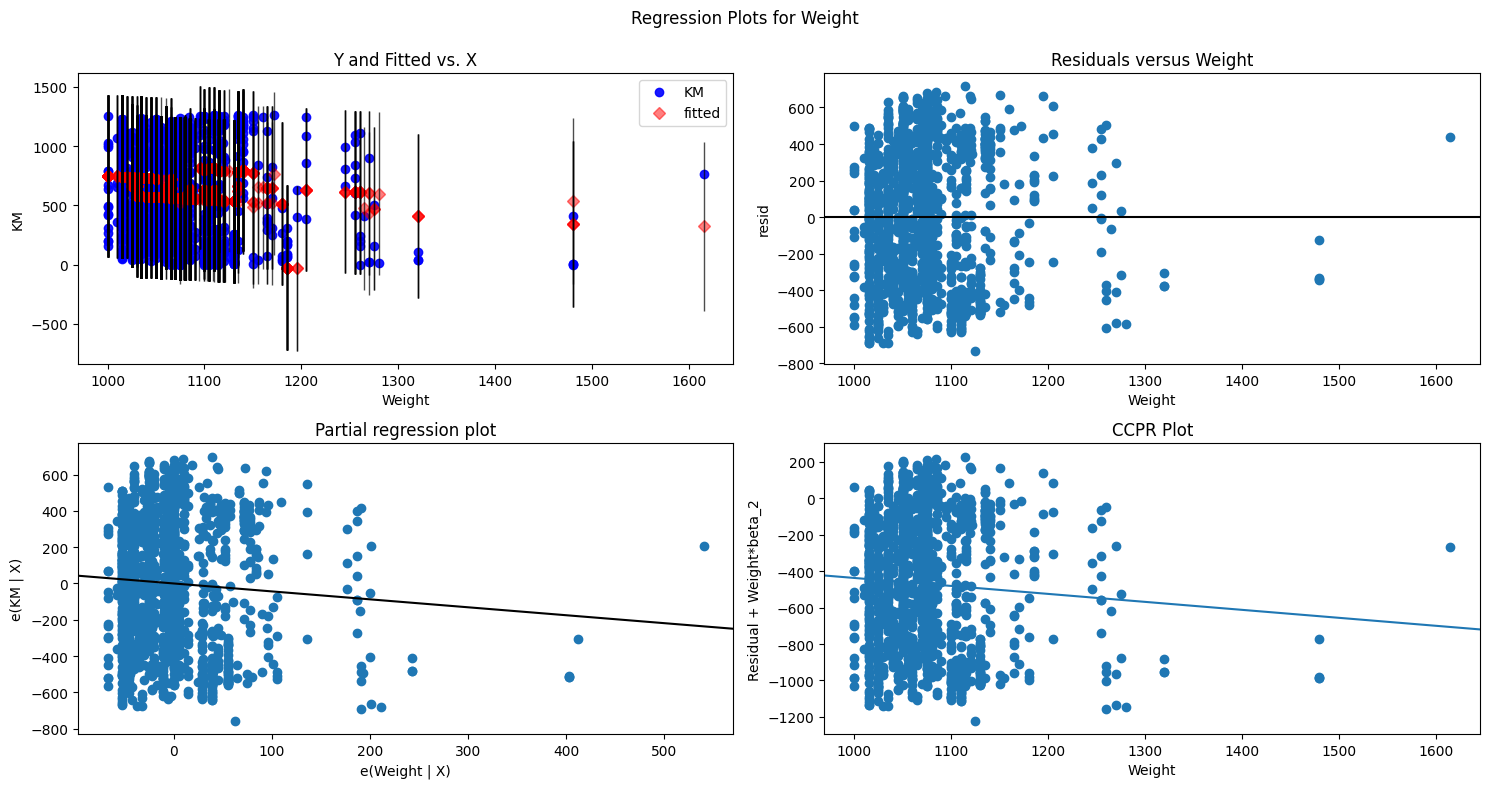

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_wv, 'Weight', fig=fig)
plt.show()